In [7]:
import sys
sys.path.append("..")

import numpy as np
import os
import pandas as pd
from scipy.optimize import curve_fit
import timeit

%load_ext autoreload
%autoreload 2

from sicm.plots import plot_generic
from sicm.models.model import Laser

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
Xs = []
Ys = []
data_dir = "S:\\UsersData\\Martin\\2019\\04_April\\12"
data_dir = "/run/user/1000/gvfs/smb-share:server=itet-stor.ee.ethz.ch,share=mholub/sicm/UsersData/Martin/2019/05_May"
fname_base = "laser_calibration_00{}.csv"
for exp_num in [4]:
    fname = fname_base.format(exp_num)
    fpath = os.path.normpath(os.path.join(data_dir, fname))

    df = pd.read_csv(fpath, header = None, index_col = False, sep = ",", usecols = [0, 1, 2])
    df.columns = [x + " [" + y + "]" for x, y in zip(df.iloc[0, :].values, df.iloc[1, :].values)]
    df = df.drop([0, 1]).reset_index().astype(np.float)
    Xs.append(df["diode current [a.u.]"].values)
    Ys.append(df["avg power [mW]"].values)

Fitting Laser._fit_wrapper.<locals>._relu_fit to 25 datapoints ...
Found parameters: [ 133.51109251 -219.06531199].
Finished in 0.002 s
error on fit: 9.995368608E-03


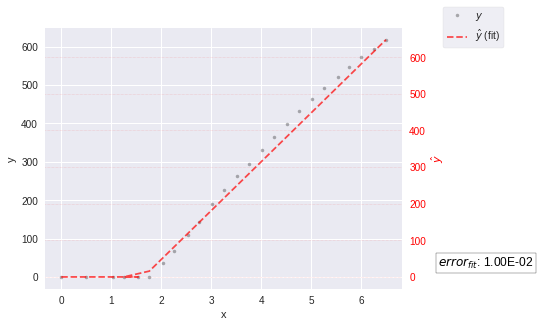

In [12]:
laser = Laser(np.asarray(Xs[0][1:]), np.asarray(Ys[0][1:]))
laser.fit()

Saved figure to /run/user/1000/gvfs/smb-share:server=itet-stor.ee.ethz.ch,share=mholub/sicm/UsersData/Martin/2019/05_May/laser_calibration_004.pdf.


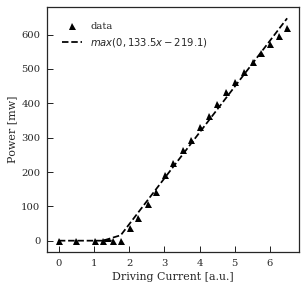

In [14]:
plot_generic([laser.x, laser.x], [laser.y, laser.fun(laser.x, *laser.popt)],
            ["Driving Current [a.u.]"], ["Power [mw]"],
            ["data", r"$max(0, {:.1f}x {:.1f})$".format(*laser.popt)],
            fmts = ["^k", "--k"],
            fname = fpath)